<a href="https://colab.research.google.com/github/vinayykkumar/Visionary-Advanced-Image-Recognition-for-the-Next-Era_Infosys_Internship_Oct2024/blob/Karthick/Facial_detection_and_Model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image  # Ensure this import
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Visionary'
train_dataset_raw = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)
validation_dataset_raw = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)


Found 439 files belonging to 10 classes.
Using 352 files for training.
Found 439 files belonging to 10 classes.
Using 87 files for validation.


In [ ]:
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset_raw.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset_raw.map(lambda x, y: (normalization_layer(x), y))

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_dataset_raw.class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.1200 - loss: 2.5233 - val_accuracy: 0.1149 - val_loss: 2.2989
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.0813 - loss: 2.3134 - val_accuracy: 0.0690 - val_loss: 2.2975
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1583 - loss: 2.2912 - val_accuracy: 0.1609 - val_loss: 2.2757
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.1857 - loss: 2.2599 - val_accuracy: 0.1954 - val_loss: 2.1584
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2393 - loss: 2.1707 - val_accuracy: 0.4713 - val_loss: 1.8377
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4061 - loss: 1.8083 - val_accuracy: 0.4483 - val_loss: 1.7332
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4307 - loss: 1.6822 - val_accuracy: 0.4943 - val_loss: 1.4038
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5779 - loss: 1.3172 - val_accuracy: 0.5862 - val_loss: 1.2303
Epo

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print(f'Validation accuracy: {accuracy:.4f}')

model.save('/content/drive/MyDrive/Colab Notebooks/face_recognition_model.h5')
print("Model saved successfully!")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.6844 - loss: 1.3879


Validation accuracy: 0.7126
Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class: ranveer_singh


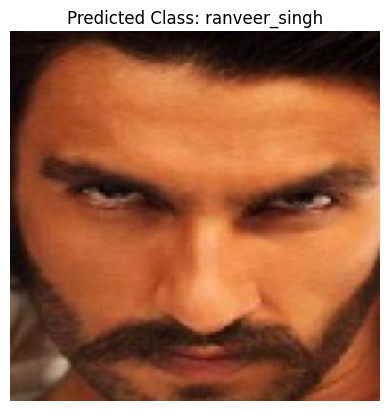

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Visionary/ranveer_singh/happy/0189bb62af.jpg'  # Change if needed
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
class_names = ['ranveer_singh', 'ranvir_shorey', 'ratna_pathak_shah', 'rekha', 'richa_chadha', 'rishi_kapoor', 'riteish_deshmukh', 'sachin_khedekar', 'saeed_jaffrey', 'saif_ali_khan']

predicted_class = class_names[predicted_class_index]
print(f"Predicted Class: {predicted_class}")

plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()
